In [31]:
import os as os
import os.path
import pickle
import scipy.io
import numpy as np
import time
import datetime
import json
from pprint import pprint
import wget
import datetime
import matplotlib.pyplot as plt

In [41]:
datetime.date.today()
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(1517212800))
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(1517212803))
datetime.datetime(2018,1,29,0,0).timestamp()
datetime.datetime(2018,8,27,19,0,0).strftime("%m-%d-%Y %H:%M%p")

'08-27-2018 19:00PM'

In [42]:
if os.path.exists("street_name"):
    os.remove("street_name")

#url = 'http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1535415902'
url = 'http://portal.cvst.ca/api/0.1/HW_speed/street_name'
wget.download(url);

# Section One
### Download data from CVST portal

In [46]:
def queryNextHWspeedData(ts_str):
    if os.path.exists("HW_speed"):
        os.remove("HW_speed")

    #url = 'http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1535415902'
    url = 'http://portal.cvst.ca/api/0.1/HW_speed'+'?timestamp='+str(ts_str)
    print("------Requested timestamp date_time: ", time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(ts_str))))
    print("------Downloading Data from: ", url) 
    wget.download(url)
    json_file = open('HW_speed').read()
    return json.loads(json_file)
    # daily_data.append(json.loads(json_file))

In [47]:
import pytz
def getUTCTimestamp(year,month,day):
    hour = 0;
    minute = 0;
    second = 5;
    
    #tzinfo=pytz.timezone.
    local_datetime = datetime.datetime(year,month,day,hour,minute,second)
    timestamp = local_datetime.timestamp()
    #timestamp = local_datetime.replace(tzinfo=pytz.timezone.utc).timestamp()    
    return timestamp;

In [48]:
def dumpJSONdata(timestamp, input_raw_data):
    json_write_file_name = "daily_data/"+'data_' + str(timestamp) + '_input_raw_data' +'.json'
    print("------Write next timestamp input_raw_data: ", json_write_file_name)
    print()
    json_file_ref = open(json_write_file_name, 'w')
    json.dump(input_raw_data, json_file_ref)
    json_file_ref.close()

In [51]:
def getHWspeedData(year, month, day, count, spacing):
    input_raw_data = []

    timestamp_array = []
    start_ts = int(getUTCTimestamp(year,month,day)) - 5*60*60
    #start_ts = int(getUTCTimestamp(year,month,day))
    print("--getUTCTimestamp completed: ",start_ts)
    print("---------------------------------------------")

    # Get data for number of count
    for n in range(count): 
        next_ts_str = start_ts + n * spacing #go to next sample spacing in seconds 
        timestamp_array.append(next_ts_str) #keep timestamp reference
        print("----getNextSpeedData started: ", next_ts_str)
        input_raw_data.append(queryNextHWspeedData(int(next_ts_str)))
    dumpJSONdata(start_ts, input_raw_data)

In [52]:
#number of smaples to read
sample_per_day = 24 * 12 #samples = 1 Day x 24 Hours x 12 Samples/Hours (every 5 mites)
sample_spacing__in_minutes = 24 * 60 / sample_per_day
sample_spacing_seconds = sample_spacing__in_minutes * 60
no_of_days = 1

for n in range (no_of_days):
    getHWspeedData(2018, 1, n+1, sample_per_day, sample_spacing_seconds)

--getUTCTimestamp completed:  1514764805
---------------------------------------------
----getNextSpeedData started:  1514764805.0
------Requested timestamp date_time:  2017-12-31 19:00:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514764805
----getNextSpeedData started:  1514765105.0
------Requested timestamp date_time:  2017-12-31 19:05:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514765105
----getNextSpeedData started:  1514765405.0
------Requested timestamp date_time:  2017-12-31 19:10:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514765405
----getNextSpeedData started:  1514765705.0
------Requested timestamp date_time:  2017-12-31 19:15:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514765705
----getNextSpeedData started:  1514766005.0
------Requested timestamp date_time:  2017-12-31 19:20:05
------Downloading Data from:  http://portal

----getNextSpeedData started:  1514777705.0
------Requested timestamp date_time:  2017-12-31 22:35:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514777705
----getNextSpeedData started:  1514778005.0
------Requested timestamp date_time:  2017-12-31 22:40:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514778005
----getNextSpeedData started:  1514778305.0
------Requested timestamp date_time:  2017-12-31 22:45:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514778305
----getNextSpeedData started:  1514778605.0
------Requested timestamp date_time:  2017-12-31 22:50:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514778605
----getNextSpeedData started:  1514778905.0
------Requested timestamp date_time:  2017-12-31 22:55:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514778905
----getNextSpeedData started:  151477920

----getNextSpeedData started:  1514790605.0
------Requested timestamp date_time:  2018-01-01 02:10:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514790605
----getNextSpeedData started:  1514790905.0
------Requested timestamp date_time:  2018-01-01 02:15:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514790905
----getNextSpeedData started:  1514791205.0
------Requested timestamp date_time:  2018-01-01 02:20:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514791205
----getNextSpeedData started:  1514791505.0
------Requested timestamp date_time:  2018-01-01 02:25:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514791505
----getNextSpeedData started:  1514791805.0
------Requested timestamp date_time:  2018-01-01 02:30:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514791805
----getNextSpeedData started:  151479210

----getNextSpeedData started:  1514803505.0
------Requested timestamp date_time:  2018-01-01 05:45:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514803505
----getNextSpeedData started:  1514803805.0
------Requested timestamp date_time:  2018-01-01 05:50:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514803805
----getNextSpeedData started:  1514804105.0
------Requested timestamp date_time:  2018-01-01 05:55:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514804105
----getNextSpeedData started:  1514804405.0
------Requested timestamp date_time:  2018-01-01 06:00:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514804405
----getNextSpeedData started:  1514804705.0
------Requested timestamp date_time:  2018-01-01 06:05:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514804705
----getNextSpeedData started:  151480500

----getNextSpeedData started:  1514816405.0
------Requested timestamp date_time:  2018-01-01 09:20:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514816405
----getNextSpeedData started:  1514816705.0
------Requested timestamp date_time:  2018-01-01 09:25:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514816705
----getNextSpeedData started:  1514817005.0
------Requested timestamp date_time:  2018-01-01 09:30:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514817005
----getNextSpeedData started:  1514817305.0
------Requested timestamp date_time:  2018-01-01 09:35:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514817305
----getNextSpeedData started:  1514817605.0
------Requested timestamp date_time:  2018-01-01 09:40:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514817605
----getNextSpeedData started:  151481790

----getNextSpeedData started:  1514829305.0
------Requested timestamp date_time:  2018-01-01 12:55:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514829305
----getNextSpeedData started:  1514829605.0
------Requested timestamp date_time:  2018-01-01 13:00:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514829605
----getNextSpeedData started:  1514829905.0
------Requested timestamp date_time:  2018-01-01 13:05:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514829905
----getNextSpeedData started:  1514830205.0
------Requested timestamp date_time:  2018-01-01 13:10:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514830205
----getNextSpeedData started:  1514830505.0
------Requested timestamp date_time:  2018-01-01 13:15:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514830505
----getNextSpeedData started:  151483080

----getNextSpeedData started:  1514842205.0
------Requested timestamp date_time:  2018-01-01 16:30:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514842205
----getNextSpeedData started:  1514842505.0
------Requested timestamp date_time:  2018-01-01 16:35:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514842505
----getNextSpeedData started:  1514842805.0
------Requested timestamp date_time:  2018-01-01 16:40:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514842805
----getNextSpeedData started:  1514843105.0
------Requested timestamp date_time:  2018-01-01 16:45:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514843105
----getNextSpeedData started:  1514843405.0
------Requested timestamp date_time:  2018-01-01 16:50:05
------Downloading Data from:  http://portal.cvst.ca/api/0.1/HW_speed?timestamp=1514843405
----getNextSpeedData started:  151484370

### End Section One

# Section Two
### Data visualization

In [ ]:
def loadJSONfile(yr, mnth, dy)
    json_read_file_name = "daily_data/"+'data_' + \
        str(yr) + "_" + str(mnth) + "_" + str(dy) + \
        '_input_raw_data' +'.json'
    print("------Read next day's input_raw_data: ", json_read_file_name)
    json_read_file_ref = open(json_read_file_name).read()
    data = json.loads(json_read_file_ref)
    return data

In [501]:
def getEpocData(input_data):
    epoc_data = []
    for n in range(len(input_data)):
        next_data = input_data[n][0]
        for field in next_data:
            if field == 'data':
                epoc_data = next_data[field]
            #elif field == 'timestamp':
            #    print("-----------Returned HW_speed json data, timestamp: ", next_data[field])
            elif field == 'date_time':
                print("------Reading data for next timestamp date_time:", next_data[field])
            
            epoc_data.append(epoc_data)
            
    return epoc_data               

In [ ]:
def get

In [ ]:
 def getSingleSensorData(input_data, field_name, sensor_no)
    field_data = []
    snecorLocation = getSensorLocation(sensor_no)
    plot()
    
    for n in range(len(inout_data))
        for item in input_data[n]:
            for info in item:
                if info == field_name:
                    field_data.append(item[info])
        output_data.append(field_data)
    return output_data 

In [43]:
# Read Daily data one at a time for number od days given
year = 2018
month = 1
no_of_days = 2

trafficParam = 'JAM_FACTOR' 
trafficParam = 'avg_speed_capped'
trafficParam = 'free_flow_speed'

mapplotSensorCount = 250
plotSensorNo = 58
paramTensor = []

data_tensor = []
extended_speed_cp = []

for day in range (no_of_days):
    print("----loadJSONfile")
    daily_data = loadJSONfile(year, month, day+1)
    print("------getEpocData")
    data_tensor.append(extended_speed_cp.append(getEpocData(daily_data)))

getParamTensor()
[sensorLocation, ] = getSingleSensorData(trafficParam,)
getMultipleSensorData(start,end, )

------Read next day's input_raw_data:  daily_data/data_2018_1_2_input_raw_data.json
------getNextStateVector
------Read next day's input_raw_data:  daily_data/data_2018_1_3_input_raw_data.json
------getNextStateVector


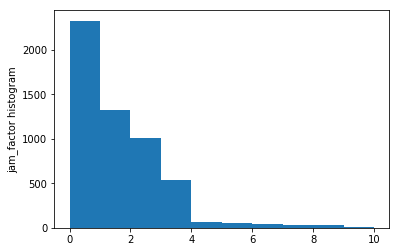

In [135]:
plt.hist(jam_factor)
plt.ylabel('jam_factor histogram')
plt.show()

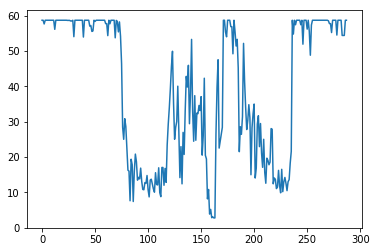

In [518]:
single_sensor_avg_speed = []
for n in range(len(extended_speed_cp[1])):
    single_sensor_avg_speed.append(avg_speed_cp[n][1])
plt.plot(single_sensor_avg_speed)
plt.show()

In [467]:
matlab_file = open('/home/cvst2017/Documents/workfolder/fromMai/Jan_26.fig','rb').read()
scipy.io.loadmat(matlab_file, mdict='avg_speed_uncapped', appendmat=True)

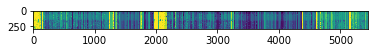

In [513]:
plt.imshow(extended_speed_cp[0])
plt.show()

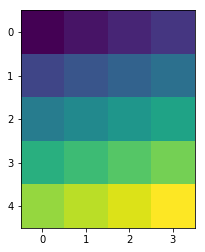

In [223]:
import numpy as np 
import matplotlib.pyplot as plt

H = np.array([[1, 2, 3, 4],
          [5, 6, 7, 8],
          [9, 10, 11, 12],
          [13, 14, 15, 16],
          [17, 18, 19, 20]])

plt.imshow(H)
plt.show()

In [ ]:
from google.cloud import datastore

client = datastore.Client()
product_key = client.key('Product', 123)
print(client.get(product_key))

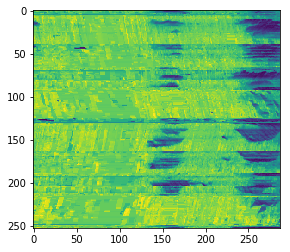

In [35]:
#pickle_file = open('/home/cvst2017/Documents/workfolder/fromMai/test_week_speed_Jan29.pickle','rb')
pickle_file = open('test_week_speed_Jan29.pickle','rb')
pickle_data = pickle.load(pickle_file)
# pprint(pickle_data)
plt.imshow(pickle_data)
plt.show()